<a href="https://colab.research.google.com/github/Gourabb8/Excelr-Data-science-Assignments/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## 1. Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA).  
b. Examine the features, their types, and summary statistics.  
c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.  
Analyze any patterns or correlations observed in the data.
## 2. Data Preprocessing:
a. Handle missing values (e.g., imputation).  
b. Encode categorical variables.
## 3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).  
b. Train the model using the training data.
## 4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.  
Visualize the ROC curve.
## 5. Interpretation:
a. Interpret the coefficients of the logistic regression model.  
b. Discuss the significance of features in predicting the target variable (survival probability in this case).
## 6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit.   The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.

(optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories.
Detailed deployment instructions are available in the Streamlit Documentation.
https://docs.streamlit.io/streamlit-community-cloud/deploy-your-app
### Interview Questions:
1. What is the difference between precision and recall?
2. What is cross-validation, and why is it important in binary classification?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/Titanic_train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Importing Required libraries

In [3]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


# Data Exploration

In [10]:
# Load the dataset
data = pd.read_csv('/content/Titanic_train.csv')

## Data Dictionary
PassengerId: Unique identifier for each passenger.  
Survived: Binary indicator of survival (0 = No, 1 = Yes).  
Pclass: Passenger's class (1 = 1st, 2 = 2nd, 3 = 3rd).  
Name: Name of the passenger.  
Sex: Gender of the passenger (male/female).  
Age: Age of the passenger.  
SibSp: Number of siblings/spouses aboard the Titanic.  
Parch: Number of parents/children aboard the Titanic.  
TicketFare: Fare paid for the ticket.  
Cabin: Cabin number of the passenger.  
Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Embarked has negligible missing values.  
Age has some missing values,  
cabin has lots of missing values.  


In [15]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the data head. we can see the name, sex, Ticket number cabin, Embarked are objects.

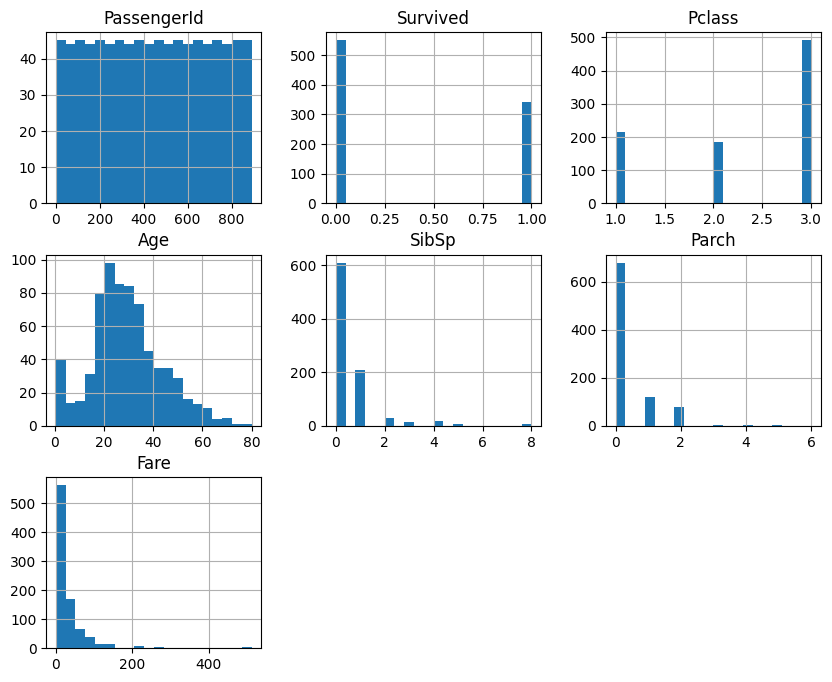

In [5]:
# b. Visualizations
# Histogram of numerical features
data.hist(bins=20, figsize=(10, 8))
plt.show()

<Axes: >

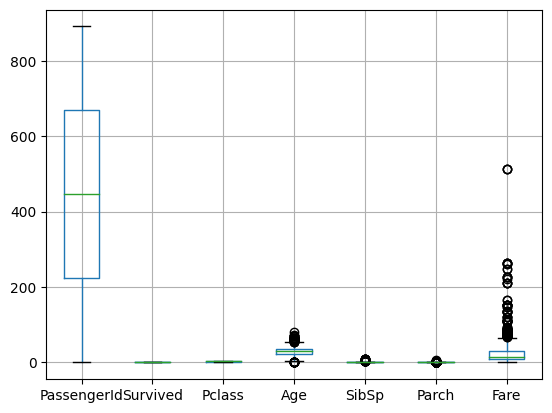

In [27]:
# Boxplot of numerical features
data.boxplot()

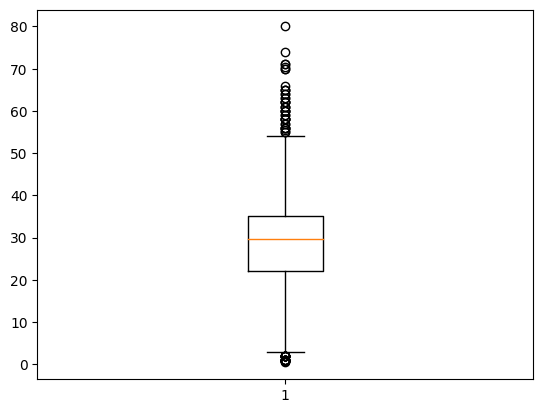

In [33]:

plt.boxplot(data["Age"]);

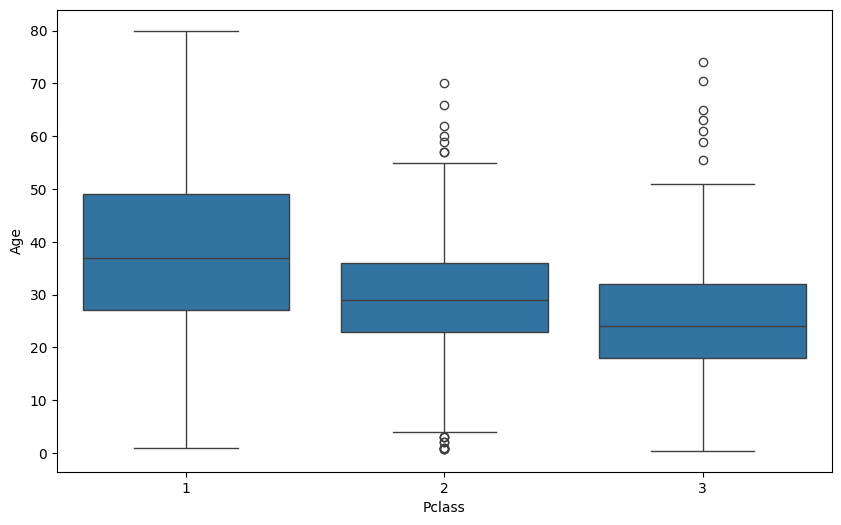

In [6]:
# Box plot to visualize distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=data)
plt.show()



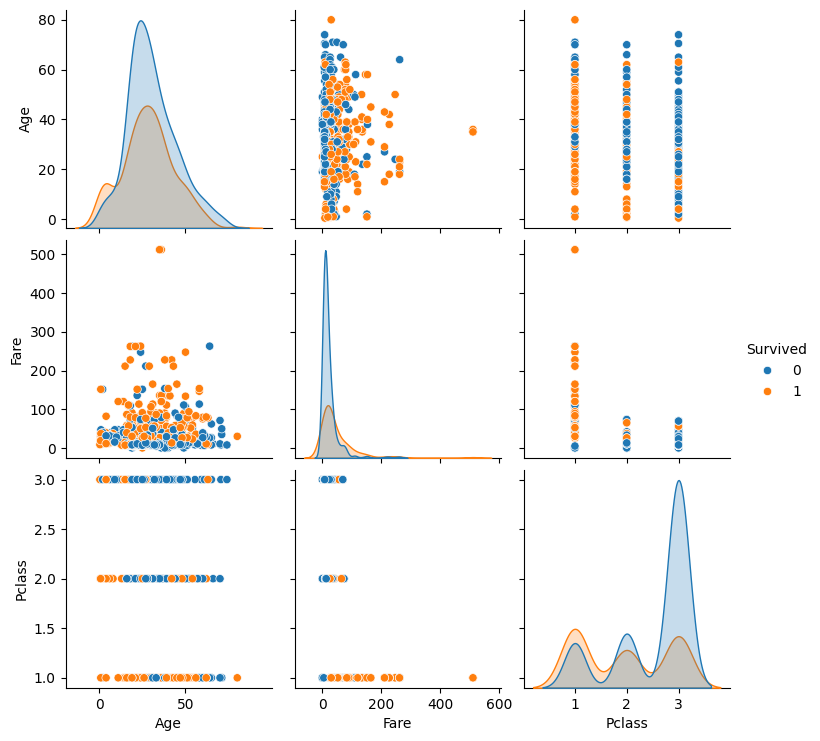

In [7]:
# Pair plot to visualize relationships
sns.pairplot(data[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.show()



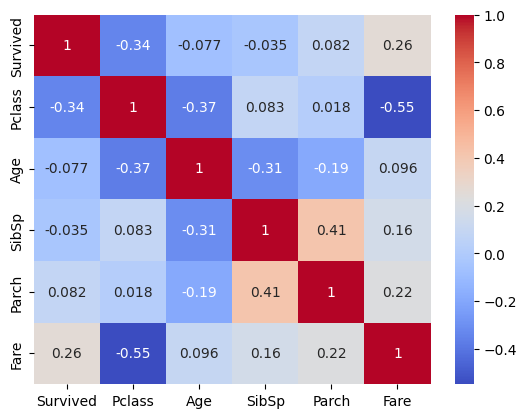

In [20]:
# c. Analyze patterns or correlations
corr_matrix = data.drop(columns=['PassengerId',	'Name'	,'Sex',	'Ticket'	,'Cabin','Embarked'],axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Data Preprocessing

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:

# a. Handling missing values
# Impute missing values for 'Age' and 'Embarked'
imputer = SimpleImputer(strategy='mean')
data['Age'] = imputer.fit_transform(data[['Age']])

imputer_embarked = SimpleImputer(strategy='most_frequent')
data['Embarked'] = imputer_embarked.fit_transform(data[['Embarked']])[:, 0]



In [ ]:
# Dropping the 'Cabin' column due to many missing values
data = data.drop(['Cabin'], axis=1)

# dropping columns which can't add any predictive power to the model
data = data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)


In [68]:

# b. Encoding categorical variables
# Define columns
categorical_features = ['Sex', 'Embarked', 'Pclass']
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])



In [77]:
# Separate features and target
# X = data[['Pclass',	'Sex',	'Age',	'SibSp',	'Parch',	'Fare',	'Embarked']]
X = data.drop(columns=['Survived'])
y = data['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to the training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [79]:
# converting back to df
columns= ['Age', 'Fare', 'SibSp', 'Parch','Sex', 'Emb-1','Emb-2', 'Pclass-1','Pclass-2']
X_train = pd.DataFrame(X_train,columns=columns)
X_test = pd.DataFrame(X_test,columns=columns)
X_train.head()

,Age,Fare,SibSp,Parch,Sex,Emb-1,Emb-2,Pclass-1,Pclass-2
0,1.229207,-0.078684,-0.470722,-0.479342,1.0,0.0,1.0,0.0,0.0
1,-0.503505,-0.377145,-0.470722,-0.479342,1.0,0.0,1.0,1.0,0.0
2,0.189580,-0.474867,-0.470722,-0.479342,1.0,0.0,1.0,0.0,1.0
3,-0.272477,-0.476230,0.379923,-0.479342,1.0,0.0,1.0,0.0,1.0
4,-1.812666,-0.025249,2.931860,2.048742,0.0,0.0,1.0,0.0,1.0


In [81]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Assuming X_train is your DataFrame with all numeric features
# If X_train contains any categorical variables, ensure they are one-hot encoded

# Add a constant to the DataFrame for the intercept
X_train_with_const = sm.add_constant(X_train)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]

# Display the VIFs
print(vif_data)

    Feature        VIF
0     const  12.358237
1       Age   1.216104
2      Fare   1.775214
3     SibSp   1.317460
4     Parch   1.391726
5       Sex   1.117132
6     Emb-1   1.494073
7     Emb-2   1.496187
8  Pclass-1   2.146287
9  Pclass-2   2.799343


# Model Building

In [70]:
# a. Build a logistic regression model
model = LogisticRegression()

# b. Train the model
model.fit(X_train, y_train)

LogisticRegression()

# Model Evaluation

In [71]:

# a. Make predictions on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]



In [72]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")



Accuracy: 0.80
Precision: 0.79
Recall: 0.72
F1 Score: 0.75
ROC AUC: 0.88


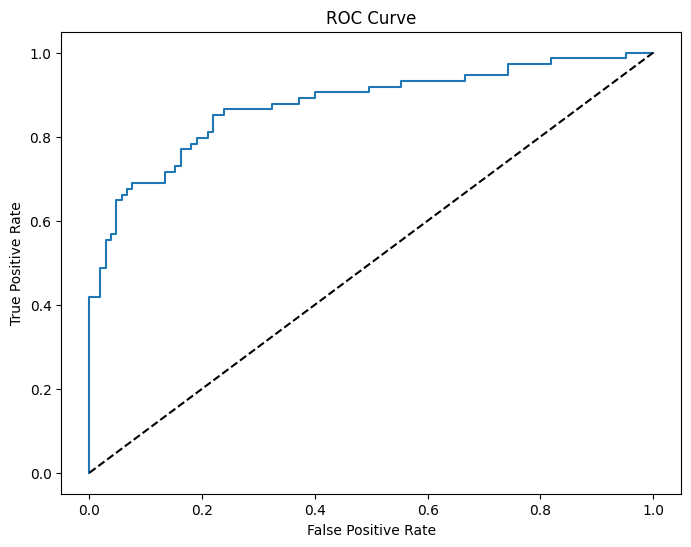

In [73]:
# Visualize the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Interpretation

In [74]:
# a. Interpret the coefficients
coefficients = pd.DataFrame(model.coef_.T, index=preprocessor.get_feature_names_out(), columns=['Coefficient'])
print(coefficients)

# b. Discuss the significance of features
# Example: Higher positive coefficients indicate a higher probability of survival, while negative coefficients indicate a lower probability.
significant_features = coefficients[coefficients['Coefficient'].abs() > 0.1]
print(significant_features)

                 Coefficient
num__Age           -0.368166
num__Fare           0.215518
num__SibSp         -0.339804
num__Parch         -0.102401
cat__Sex_male      -2.567891
cat__Embarked_Q    -0.111496
cat__Embarked_S    -0.463880
cat__Pclass_2      -0.385715
cat__Pclass_3      -1.598425
                 Coefficient
num__Age           -0.368166
num__Fare           0.215518
num__SibSp         -0.339804
num__Parch         -0.102401
cat__Sex_male      -2.567891
cat__Embarked_Q    -0.111496
cat__Embarked_S    -0.463880
cat__Pclass_2      -0.385715
cat__Pclass_3      -1.598425


# Deploying the model using Streamlit

### installing the dependencies

In [ ]:
pip install streamlit

# Preparing the machine learning model

In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression

# Assume X_train and y_train are already defined
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'logistic_regression_model.pkl')

# create a Streamlit app

In [ ]:
import streamlit as st
import joblib
import numpy as np

# Load the trained model
model = joblib.load('logistic_regression_model.pkl')

# Title and Description
st.title('Titanic Survival Prediction')
st.write('Enter passenger details to predict survival probability.')

# Input features from the user
Pclass = st.selectbox('Pclass', [1, 2, 3])
Sex = st.selectbox('Sex', ['male', 'female'])
Age = st.slider('Age', 0, 100, 25)
SibSp = st.number_input('Number of Siblings/Spouses aboard', 0, 10, 0)
Parch = st.number_input('Number of Parents/Children aboard', 0, 10, 0)
Fare = st.number_input('Passenger fare', 0.0, 1000.0, 15.0)
Embarked = st.selectbox('Port of Embarkation', ['C', 'Q', 'S'])

# Encode categorical variables
Sex = 1 if Sex == 'male' else 0
Embarked_C = 1 if Embarked == 'C' else 0
Embarked_Q = 1 if Embarked == 'Q' else 0
Embarked_S = 1 if Embarked == 'S' else 0

# Create a feature vector for prediction
features = np.array([[Pclass, Sex, Age, SibSp, Parch, Fare, Embarked_C, Embarked_Q, Embarked_S]])

# Predict survival probability
prediction = model.predict(features)
probability = model.predict_proba(features)[0][1]

# Display the result
st.write(f'Survival Prediction: {"Survived" if prediction[0] else "Did Not Survive"}')
st.write(f'Survival Probability: {probability:.2f}')

### Run the Streamlit app

In [ ]:
streamlit run app.py